<a href="https://colab.research.google.com/github/zhengwu123/Machine_learning_group_project/blob/master/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import glob
import cv2
from PIL import Image
from numpy import asarray
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import numpy as np


In [5]:
!unzip unsorted.zip


Archive:  unsorted.zip
   creating: unsorted/
  inflating: unsorted/.DS_Store      
   creating: __MACOSX/
   creating: __MACOSX/unsorted/
  inflating: __MACOSX/unsorted/._.DS_Store  
   creating: unsorted/real/
  inflating: unsorted/real/RackMultipart20200416-3319-30q81a.jpg  
   creating: __MACOSX/unsorted/real/
  inflating: __MACOSX/unsorted/real/._RackMultipart20200416-3319-30q81a.jpg  
  inflating: unsorted/real/RackMultipart20200503-25959-1dlurcm.jpg  
  inflating: __MACOSX/unsorted/real/._RackMultipart20200503-25959-1dlurcm.jpg  
  inflating: unsorted/real/IMG_2947(20200415-235546).JPG  
  inflating: __MACOSX/unsorted/real/._IMG_2947(20200415-235546).JPG  
  inflating: unsorted/real/RackMultipart20200503-25959-kj84jd.jpg  
  inflating: __MACOSX/unsorted/real/._RackMultipart20200503-25959-kj84jd.jpg  
  inflating: unsorted/real/RackMultipart20200503-25510-160a0cp.jpg  
  inflating: __MACOSX/unsorted/real/._RackMultipart20200503-25510-160a0cp.jpg  
  inflating: unsorted/real/RackM

In [0]:
#rename all my files
import glob, os

def rename(dir, pattern, titlePattern):
    for pathAndFilename in glob.iglob(os.path.join(dir, pattern)):
        title, ext = os.path.splitext(os.path.basename(pathAndFilename))
        os.rename(pathAndFilename, 
                  os.path.join(dir, titlePattern % title + ext))
#rename all files
rename('unsorted/real', '*.JPG', '%s'+ " real")
rename('unsorted/fake', '*.JPG', '%s'+ " fake")
rename('unsorted/real', '*.jpg', '%s'+ " real")
rename('unsorted/fake', '*.jpg', '%s'+ " fake")

In [0]:
# prepare data
import random
train_real = ['unsorted/real/{}'.format(i) for i in os.listdir("unsorted/real") if 'real' in i]
train_fake = ['unsorted/fake/{}'.format(i) for i in os.listdir("unsorted/fake") if 'fake' in i]
train_images = train_fake + train_real
random.shuffle(train_images)

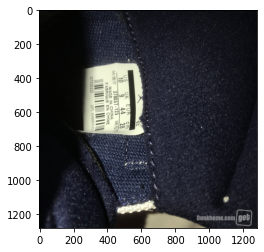

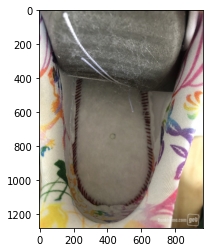

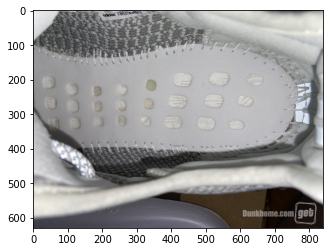

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
for ima in train_images[0:3]:
  img=mpimg.imread(ima)
  imgplot = plt.imshow(img)
  plt.show()

In [0]:
nrows = 150
ncolumns = 150
channels = 3  #change to 1 if you want to use grayscale image


#A function to read and process the images to an acceptable format for our model
def read_and_process_image(list_of_images):
    """
    Returns two arrays: 
        X is an array of resized images
        y is an array of labels
    """
    X = [] # images
    y = [] # labels
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation=cv2.INTER_CUBIC))  #Read the image
        #get the labels
        if 'real' in image:
            y.append(1)
        elif 'fake' in image:
            y.append(0)
    
    return X, y

In [0]:
# put traing image into x , y
X, y = read_and_process_image(train_images)
X = np.array(X)
y = np.array(y)

In [27]:
print("Shape of train images is:", X.shape)
print("Shape of labels is:", y.shape)

Shape of train images is: (2085, 150, 150, 3)
Shape of labels is: (2085,)


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [0]:
from tensorflow.keras.layers import Input, Conv2D, Conv3D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras import optimizers


In [49]:
model = Sequential()

#add conv1
model.add(Conv2D(32,(3,3),activation='relu',strides=1,padding="VALID", input_shape=(150,150,3)))
#add pool1
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#add conv2
model.add(Conv2D(64, (3, 3),strides=(3,3),activation='relu',padding="VALID"))
#add pool2
model.add(MaxPooling2D(pool_size=(4, 4), strides=(4, 4)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(7, activation='sigmoid'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#x_train = np.array(real_image_array)
#x_test = np.array(fake_images_array)
#y_train = np.array(fake_images_array)
#y_test = np.array(y_test)
#model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
r = model.fit(x_train,y_train,batch_size=100,epochs=100)
#model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Epoch 1/100
17/17 [==============================] - 0s 18ms/step - loss: 1.6840 - accuracy: 0.4706
Epoch 2/100
17/17 [==============================] - 0s 17ms/step - loss: 0.6931 - accuracy: 0.4964
Epoch 3/100
17/17 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4964
Epoch 4/100
17/17 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4964
Epoch 5/100
17/17 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4964
Epoch 6/100
17/17 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4964
Epoch 7/100
17/17 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4964
Epoch 8/100
17/17 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4964
Epoch 9/100
17/17 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4964
Epoch 10/100
17/17 [==============================] - 0s 18ms/step - loss: 0.6931 - accuracy: 0.4964

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 4610      
Total params: 24,002
Trainable params: 24,002
Non-trainable params: 0
____________________________________________________

[1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0
 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0
 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1
 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1
 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1
 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1
 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0
 0 0 0 1 1 1 1 1 1 0]


In [33]:
y_result = model.predict(x_test[0])
diff_count = 0
y_test_array =[]
print(len(y_test))
print(y_result)
for i in range(len(y_result)):
  #print(y_result[i][0])
  if y_result[i][0] > 0.9:
    y_test_array.append(1)
  elif y_result[i][1] > 0.9:
    y_test_array.append(0)


print(y_test_array)
#print(sum)
#print("accuracy:", 
#      sum/len(y_result))


417
[[9.4338739e-01 3.2067117e-13 1.0000000e+00 ... 6.1615982e-23
  6.6977342e-27 1.1344098e-06]
 [1.0000000e+00 1.0000000e+00 3.8422868e-02 ... 2.2060702e-10
  8.6535343e-35 5.6630423e-11]
 [4.8371461e-01 9.9785918e-01 6.6338926e-06 ... 3.8380596e-15
  1.6024900e-28 1.8140001e-13]
 ...
 [9.9918777e-01 2.5275196e-07 9.9999714e-01 ... 7.8219735e-25
  2.7237806e-32 4.5415810e-15]
 [2.0595007e-02 3.4129805e-06 9.9988961e-01 ... 1.2146262e-35
  2.8277924e-32 1.9735187e-04]
 [9.6499914e-01 2.7892441e-18 1.0000000e+00 ... 9.4535742e-12
  1.3845953e-32 3.6096758e-01]]
[1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,